## Task 1: Gridworld

In this task, you will implement Value Iteration to solve for the optimal policy, $\pi^*$, and the corresponding state value function, $V^*$.

The MDP you will work with in this assignment is illustrated in the figure below.

![title](./grid_world.png) 

The agent starts in one of the non-black squares shown in the above figure, and then proceeds to take actions. The available actions at any time step are: **North, West, South,** and **East**. If an action would make the agent bump into a wall, or one of the black (unreachable) states, it instead does nothing, leaving the agent at the same place it was before.

The reward $\mathcal{R}_s^a$ of being in state $s$ and performing actions $a$ is zero for all states, regardless of the action taken, with the exception of the green and the red squares. For the green square, the reward is always 1, and for the red square, always -1, regardless of the action.

When the agent is either in the green or the red square, it will be transported to the terminal state in the next time step, regardless of the action taken. The terminal state is shown as the white square with the "T" inside.

#### State representation
The notations used to define the states are illustrated in the table below

| $S_0$ | $S_1$ | $S_2$ | $S_3$ | $S_4$ |    |
|-------|-------|-------|-------|-------|----|
| $S_5$ | $S_6$ | $S_7$ | $S_8$ | $S_9$ |    |
| $S_{10}$ | $S_{11}$ | $S_{12}$ | $S_{13}$ | $S_{14}$ | $S_{15}$|

where $S_{10}$ corresponds to the initial state of the environment, $S_4$ and $S_9$ to the green and red states of the environment, and $S_{15}$ to the terminal state.


### Task 1.1: Solve for $V^*(s)$ and $Q^*(s,a)$
For this task all transition probabilities are assumed to be 1 (that is, trying to move in a certain direction will definitely move the agent in the chosen direction), and a discount factor of 0.9, i.e., $\gamma=0.9$.

* Solve for $V^*(S_{10})$ 

**Your answer:** To Solve for the V*(S$_{10})$, we use the Bellman's equation which is 
V*(S) = Max $\sum$ T(s,a,s') [(R(s,a,s') + $\gamma$(V*(s')]
<br> Substituting the values in the equation we get
<br> Max $\sum$ 1 [ 0 + 0.9(0.9(0.9(0.9(0.9(0.9(1+0.9(0)))))))]
<br> i.e (0.9)$^6$
<br> We could see that the transition probabilties for all the state is 1 and reward is 0 for all the states except the final green state which is 1. Substituting the values in the equation we end up with the final value (0.9)$^6$. 

* Solve $Q^*(S_{10},a)$ for all actions

**Your answer:** Q*(s,a) = R(s,a,s') + $\gamma$(V*(s'))
<br> Now we have to find the Q value for all the 4 directions.
<br> Q*(S$_{10}$,N) = 0 + (0.9)(V$^*$(S$_5$)) = (0.9)* (0.9)$^5$ = (0.9)$^6$
<br> Q*(S$_{10}$,E) = 0 + (0.9)(V$^*$(S$_{11}$)) = (0.9)* (0.9)$^5$ = (0.9)$^6$
<br> Q*(S$_{10}$,S) = 0 + (0.9)(V$^*$(S$_{10}$)) = (0.9)* (0.9)$^6$ = (0.9)$^7$
<br> Q*(S$_{10}$,W) = 0 + (0.9)(V$^*$(S$_{10}$)) = (0.9)* (0.9)$^6$ = (0.9)$^7$



### Task 1.2 Write a mathematical expression relating $V^\pi(s)$ to $Q^\pi(s,a)$ and $\pi(a|s)$


**Your answer:** V $^{\pi}$(S) = $\sum$ $\pi$(a|s) * Q$^{\pi}$(a,s)


###  Task 1.3: Value Iteration
For this task, the transitions are no longer deterministic. Instead, there is a 0.2 probability that the agent will try to travel in an orthogonal direction of the chosen action (0.1 probability for each of the two orthogonal directions). Note that the Markov decision process is still known and does not have to be learned from experience.

Your task is to implement value iteration and solve for the:
* optimal greedy policy $\pi^*(s)$ 
* $V^*(s)$

#### The value iteration algorithm
Value iteration is an iterative algorithm used to compute the optimal value function $V^*(s)$. Each iteration starts with a guess of what the value function is and then uses the Bellman equations to improve this guess iteratively. We can describe one iteration of the algorithm as

$
\textbf{For} ~ s \in {\cal S}:\qquad  \\
\quad V_{k+1}(s) = \underset{a \in {\cal A}}{\text{max}}~ \left( \mathcal{R}_s^a + \gamma \underset{{s'\in \mathcal{S}}}{\sum} \mathcal{P}_{ss'}^a \cdot V_k(s') \right)
$

where $\mathcal{P}_{ss'}^a={\mathrm Pr}[S'=s'\big|S=s,A=a]$ is the probability to transition from state $s$ to $s'$ given action $a$.


#### The MDP Python class
The Markov Decision Process you will work with is defined in `gridworld_mdp.py`. In the implementation, the actions are represented by integers as, North = 0, West = 1, South = 2, and East = 3.
To interact with the MDP, you need to instantiate an object as: 


```python
mdp = GridWorldMDP()
```

At your disposal there are a number of instance-functions implemented for you, and presented below:

In [7]:
from gridworld_mdp import *
import numpy as np

help(GridWorldMDP.get_states)

Help on function get_states in module gridworld_mdp:

get_states(self)
    Returns complete set of states for the MDP
    :return: numpy array of shape [num states,]



In [8]:
# The constructor
help(GridWorldMDP.__init__)

Help on function __init__ in module gridworld_mdp:

__init__(self, trans_prob=0.8)
    Initializes an instance of the GridWorldMDP class
    :param trans_prob: transition probabilities (e.g. =1 for deterministic MDP)



In [9]:
help(GridWorldMDP.get_actions)

Help on function get_actions in module gridworld_mdp:

get_actions(self)
    Returns complete set of actions for the MDP
    :return: numpy array of shape [num actions,]



In [10]:
help(GridWorldMDP.state_transition_func)

Help on function state_transition_func in module gridworld_mdp:

state_transition_func(self, s, a)
    Returns the transition probabilities to all states given current state and action
    :param state: current state as integer
    :param action: selected action as integer
    :return: state-transition probabilities, i.e.
     [P[S_0| S=s, A_t=a], P[S_1| S=s, A=a], ..., P[S_14| S=s, A=a]]



In [11]:
help(GridWorldMDP.reward_function)

Help on function reward_function in module gridworld_mdp:

reward_function(self, s, a)
    Returns the reward r(s,a)
    :param state: current state as integer
    :param action: selected action as integer
    :return: r(s,a)



We also provide two helper functions for visualizing the value function and the policies you obtain:

In [12]:
# Function for printing a policy pi
def print_policy(pi):
    print('Policy for non-terminal states: ')
    indencies = np.arange(1, 16)
    txt = '| '
    hor_delimiter = '---------------------'
    print(hor_delimiter)
    for a, i in zip(pi, indencies):
        txt += mdp.act_to_char_dict[a] + ' | '
        if i % 5 == 0:
            print(txt + '\n' + hor_delimiter)
            txt = '| '
    print('                            ---')
    print('Policy for terminal state: |', mdp.act_to_char_dict[pi[15]],'|')
    print('                            ---')            

# Function for printing a table with of the value function
def print_value_table(values, num_iterations=None):            
    if num_iterations:
        print('Values for non-terminal states after: ', num_iterations, 'iterations \n', np.reshape(values, [3, 5]), '\n')
        print('Value for terminal state:', terminal_value, '\n')
    else: 
        terminal_value = values[-1]
        print('Values for non-terminal states: \n', np.reshape(values[:-1], [3, 5]))
        print('Value for terminal state:', terminal_value, '\n')

(**1 POE**) Now it's time for you to implement your own version of value iteration to solve for the greedy policy and $V^*(s)$.

In [13]:
def value_iteration(gamma, mdp):
    """
    Returns:
        V - state value table, numpy array of shape (16,)
        pi - greedy policy table, numpy array of shape (16,)
    """
    V = np.zeros([16]) # state value table
    
    pi = np.zeros([16])
    Q = np.zeros([16,4])
    threshold = 0.0000001
    
    while (1):
        temp = 0
        for s in mdp.get_states():
            v_temp = V[s]
            for a in mdp.get_actions():
                Q[s,a] = mdp.reward_function(s,a) + gamma * np.sum(mdp.state_transition_func(s,a) * V)
            V[s] = np.max(Q[s])
            temp = max(temp, V[s]-v_temp)
        if temp < threshold:
            break
    pi = np.argmax(Q, axis=1)
    return V, pi

Run your implementation for the deterministic version of our MDP. As a sanity check, compare your analytical solutions with the output from your implementation.

In [14]:
mdp = GridWorldMDP(trans_prob=1.)
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.6561    0.729     0.81      0.9       1.      ]
 [ 0.59049   0.        0.        0.81     -1.      ]
 [ 0.531441  0.59049   0.6561    0.729     0.6561  ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | E | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Once your implementation passed the sanity check, run it for the stochastic case, where the probability of an action succeding is 0.8, and 0.2 of moving the agent in an orthogonal direction to the intended. Use $\gamma = .99$.

In [15]:
# Run for stochastic MDP, gamma = .99
mdp = GridWorldMDP()
v, pi = value_iteration(.99, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.93861973  0.95193393  0.9639533   0.97612443  1.        ]
 [ 0.92691625  0.          0.          0.88371826 -1.        ]
 [ 0.91395196  0.90255605  0.89130223  0.88057656  0.79978897]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | W | N | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Test your implementation using this function.

In [16]:
test_value_iteration(v, pi)

Passed: state-value test, for gamma=.99
Passed: policy test, for gamma=.99


Run value iteration for the same scenario as above, but now with $\gamma=.9$

In [17]:
# Run for stochastic MDP, gamma = .9
mdp = GridWorldMDP()
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.56631445  0.65360208  0.74438015  0.84776628  1.        ]
 [ 0.49725171  0.          0.          0.57185903 -1.        ]
 [ 0.43084445  0.37830243  0.41624465  0.47405641  0.2761765 ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | W | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


## Task 2: Q-learning

In the previous task, you solved for $V^*(s)$ and the greedy policy $\pi^*(s)$, with the entire model of the MDP being available to you. This is however not very practical since for most problems we are trying to solve, the model is not known, and estimating the model for some applications is a very demanding process which often also requires a lot of simplifications. 

In this task, you will implement the Q-learning algorithm, an alternative that learns $Q$-values from experience, without the need of a model.

#### Q-learning algorithm
$
\text{Initialize}~Q(s,a), ~ \forall~ s \in {\cal S},~ a~\in {\cal A} \\
\textbf{Repeat}~\text{(for each episode):}\\
\quad \text{Initialize}~s\\
\qquad \textbf{Repeat}~\text{(for each step in episode):}\\
\qquad\quad \text{Chose $a$ from $s$ using poliy derived from $Q$ (e.g., $\epsilon$-greedy)}\\
\qquad\quad \text{Take action a, observe r, s'}\\
\qquad\quad Q(s,a) \leftarrow Q(s,a) + \alpha \left(r + \gamma~\underset{a}{\text{max}}~Q(s',a) - Q(s,a) \right) \\
\qquad\quad s \leftarrow s' \\
\qquad \text{Until s is terminal}
$

### Task 2.1  Implement an $\epsilon$-greedy policy

**(1 POE)**

The goal of the Q-learning algorithm is to find the optimal policy $\pi^*$, by estimating the state action value function under the optimal policy, i.e., $Q^*(s, a)$. From $Q^*(s,a)$, the agent can follow $\pi^*$ by choosing the action that yields the largest expected value for each state, i.e., $\text{argmax}_a~Q^*(s, a)$. However, when training a Q-learning model, the agent typically follows another policy to explore the environment (instead of the one that maximizes the current Q-values). In reinforcement learning this is known as off-policy learning. 

Your task is to implement a widely popular exploration policy, known as  the $\epsilon$-greedy policy, in the cell below.

An $\epsilon$-greedy policy should:
* with probability $\epsilon$ take an uniformly-random action.
* otherwise choose the best action according to the estimated state action values.

*Hint:* The $\epsilon$-greedy policy can be implemented extra elegantly by calculating the actual resulting sampling distribution.

In [18]:
def eps_greedy_policy(q_values, eps):
    '''
    Creates an epsilon-greedy policy
    :param q_values: set of Q-values of shape (num actions,)
    :param eps: probability of taking a uniform random action 
    :return: policy of shape (num actions,)
    '''
    # YOUR CODE HERE
    m=len(q_values);
    policy = np.zeros([m])
    for i in range(m):
        if i == np.argmax(q_values):
            policy[i] = eps/m + 1 - eps;
        else:
            policy[i] = eps / m;
    return policy
    

Run the cell below to test your implementation

In [19]:
import math
mdp = GridWorldMDP()

# Test shape of output
actions = mdp.get_actions()
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"
actions = [i for i in range(10)]
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"

# Test for greedy actions
for a in actions:
    foo = np.zeros([len(actions)])
    foo[a] = 1.
    eps_greedy = eps_greedy_policy(foo, 0)
    assert np.allclose(foo, eps_greedy, rtol=1e-03), "policy is not greedy"

# Test for uniform distribution, when eps=1
eps_greedy = eps_greedy_policy(foo, 1)
assert all(math.isclose(p, eps_greedy[0], rel_tol=1e-03) for p in eps_greedy),\
    "policy does not return a uniform distribution for eps=1"
assert math.isclose(np.sum(eps_greedy), 1.0, rel_tol=1e-03), "policy distribution is not normalized"


print('Test passed, good job!')

Test passed, good job!


### Task 2.2: Implement the Q-learning algorithm

Now it's time to actually implement the Q-learning algorithm. Unlike the Value iteration where there are no direct interactions with the environment, the Q-learning algorithm builds up its estimates by interacting and exploring the environment. 

To enable the agent to explore the environment a set of helper functions are provided:

In [20]:
help(GridWorldMDP.reset)

Help on function reset in module gridworld_mdp:

reset(self)
    Resets the environment and the agent is positioned in the initial state in the bottom left corner.
    :return: state, reward, terminal



In [21]:
help(GridWorldMDP.step)

Help on function step in module gridworld_mdp:

step(self, action)
    Takes one step in the environment using the selected action
    :param action: action to execute, integer
    :return: state, reward, terminal



Implement your version of Q-learning in the cell below. 

**Hint:** It might be useful to study the pseudocode provided above. 

In [22]:
def q_learning(eps, gamma, mdp):
    Q = np.zeros([16, 4]) # state action value table
    pi = np.zeros([16]) # greedy policy table
    alpha = .01

    # YOUR CODE HERE
    n=0;
    while n!=10000:
        s_temp,r,t = mdp.reset();
        while not t:
            a = np.random.choice(mdp.get_actions(), p = eps_greedy_policy(Q[s_temp], eps))
            s,r,t = mdp.step(a)
            Q[s_temp,a] = Q[s_temp,a] + alpha*(r+gamma*max(Q[s,:]) - Q[s_temp,a])
            s_temp=s
        n+=1
    pi = np.argmax(Q, axis=1)    
    return pi, Q

Run Q-learning with for the stochastic MDP with $\epsilon = 1, \gamma=0.99$.

In [23]:
mdp = GridWorldMDP()
pi, Q = q_learning(1, .99, mdp)
print_policy(pi)

Policy for non-terminal states: 
---------------------
| E | E | E | E | S | 
---------------------
| N | N | N | W | E | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Test your implementation by running the cell below

In [24]:
test_q_learning(Q)

Passed: policy test, for gamma=.99


Run Q-learning with $\epsilon=0$

In [25]:
mdp = GridWorldMDP()
pi, Q = q_learning(0, .99, mdp)
print_policy(pi)

Policy for non-terminal states: 
---------------------
| N | N | N | N | N | 
---------------------
| N | N | N | N | S | 
---------------------
| N | N | N | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


# Task 3: Deep Double Q-learning (DDQN)
For this task, you will implement a DDQN (double deep Q-learning network) to solve one of the problems of the OpenAI gym. Before we get into details about these type of networks, let's first review the simpler, DQN (deep Q-learning network) version.

**Again, note that in the end we will implement DDQN, and not DQN.**

## Deep Q Networks (DQN)
As we saw in the video lectures, using a neural network as a state action value approximator is a great idea. However, if one tries to use this approach with Q-learning, it's very likely that the optimization will be very unstable. To remediate this, two main ideas are used.
- First, we use experience replay, in order to decorrelate the experience samples we obtain when exploring the environment.
- Second, we use two networks instead of one, in order to fix the optimization targets. Each of these ideas are explained below.

#### Experience replay
Since Q-learning is an off-policy algorithm, we may collect data by navigating in the environment using some choice of behavioral / exploratory policy $\mu$ (e.g. $\epsilon$-greedy), while still learning the $Q$ values for an optimal policy. Experience replay exploits this even further, and re-uses old data, which was collected using whatever exploratory policy we used at that moment (e.g. $\epsilon$-greedy w.r.t. to those approximate $Q$ values).

Except for re-using already collected data, another advantage of experience replay is that it allows us to decorrelate the data, by sampling experience from very different parts of the environment, rather than using the samples for training in the order they were collected when walking around in the environment.

Decorrelating the data is essential for training neural networks.

#### Fixing the optimization target
That is, for a given minibatch sampled from the replay buffer, we'll optimize the weights of only one of the networks (commonly denoted as the "online" network), using the gradients w.r.t a loss function. This loss function is computed as the mean squared error between the current action values, computed according to the **online** network, and the Q targets, computed using the other, **offline network** (which we'll also refer to as the fixed network or target network).

That is, the loss function is 

$$ L(\theta) = \frac{1}{N}\sum_{i=1}^N \left(Q(s_i,a_i; \theta\right) - Y_i)^2~,$$

where $N$ is the number of samples in your minibatch, $Q(s,a;\theta)$ is the state action value estimate, according to the online network (with parameters $\theta$), and $Y_t$ is the Q target, computed as

$$ Y_i = r_i +  \gamma ~\underset{a}{\text{max}}~Q(s_i', a; \theta^-)~, $$

where $Q(s', a;\theta')$ is the action value estimate, according to the offline network (with parameters $\theta^-$).

Finally, so that the offline parameters are also updated, we periodically copy the parameters from the online to the offline network.

#### Training loop essentials
The following key components are repeated for every time step $t$ in an episode:
1. Sample an action $a_t$ from the $\epsilon$-greedy policy w.r.t. the current estimated $Q$ values (online network), and execute the action in the environment.
1. The current transition $(s_t, a_t, r_{t+1}, s_{t+1})$ is stored in the replay buffer.
1. An entire mini-batch of transitions is sampled from the replay buffer, and a gradient step is taken to improve the online network.

## Double Deep Q Networks (DDQN)

The idea explained above works well in practice, but later it was discovered that this approach is very prone to overestimating the state action values. The main reason for this is that the max operator, used to select the greedy action when computing the Q target, uses the same values both to select and to evaluate an action (this tends to prefer overestimated actions). In order to prevent this, we can decouple the selection from the evaluation, which is the idea that created DDQN. More concretely, the Q target for a DDQN is now 

$$ Y_i = r_i + \gamma Q(s_i', \underset{a}{\text{argmax}}Q(s_i',a;\theta); \theta^-)~. $$

Hence, we're using the **online** network to select which action is best, but we use the **offline** network to evaluate the state action value for that chosen action in the next state. This is what makes DDQN not overestimate (as much) the state action values, which in turn helps us to train faster and obtain better policies.

Note that while the online network is constantly updated (as opposed to the offline network), the Q target (in which both the online and offline network are included for DDQN) should always be regarded as a constant when taking the gradient steps.

## Target notation

Several different optimization targets which are estimated with some $q$ function are often jointly referred to as "TD targets".
We strive to be consistent and separate on-policy "TD(0) targets" and off-policy "Q targets" but in other places this distinction may be less clear.

#### Environment

The problem you will solve for this task is the inverted pendulum problem. 
On [Open AIs environment documentation](https://gym.openai.com/envs/CartPole-v0) , the following description is provided:

*A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.*

Furthermore, the episode will automatically end if 200 steps are reached, as explained [here](https://github.com/openai/gym/wiki/CartPole-v0#episode-termination).

![title](./cartpole.jpg)

#### Run the cell below to see a video illustration of the environment

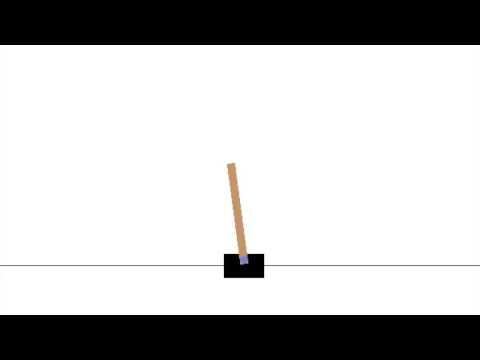

In [26]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('46wjA6dqxOM')

#### Implementation
We'll solve this task using a DDQN. Most of the code is provided for you, in the file **ddqn_model.py**. This file contains the implementation of a neural network, which is described in the table below (feel free to experiment with different architectures).

|Layer 1: units, activation | Layer 2: units, activation | Layer 3: units, activation | Cost function |
|---------------------------|----------------------------|----------------------------|---------------|
| 100, ReLu                 | 60, ReLu                   | number of actions, linear | MSE           |

There are however a few key parts missing from the code, that are to be implemented in the following three functions:
- `calc_q_and_take_action`
- `calculate_q_targets`
- `sample_batch_and_calculate_loss`

These will then be called from the function `train_loop_ddqn`, which runs the main loop for training the model in the cart-pole environment.

## Task 3.1:  Calculate Q-values & take action
Calculate Q-values for the current state, and decide on which action to take. Use an epsilon-greedy behavioral policy, and feel free to re-use the `epsilon_greedy_policy` function that you defined for the Q-learning part.

This function will be used to control the agent's behavior in the environment, but the actual training will be done later, for entire mini-batches sampled from the replay buffer.

In [27]:
def calc_q_and_take_action(ddqn, state, eps):
    '''
    Calculate Q-values for current state, and take an action according to an epsilon-greedy policy.
    Inputs:
        ddqn   - DDQN model. An object holding the online / offline Q-networks, and some related methods.
        state  - Current state. Numpy array, shape (1, num_states).
        eps    - Exploration parameter.
    Returns:
        q_online_curr   - Q(s,a) for current state s. Numpy array, shape (1, num_actions) or  (num_actions,).
        curr_action     - Selected action (0 or 1, i.e., left or right), sampled from epsilon-greedy policy. Integer.
    '''
    # FYI:
    # ddqn.online_model & ddqn.offline_model are Pytorch modules for online / offline Q-networks, which take the state as input, and output the Q-values for all actions.
    # Input shape (batch_size, num_states). Output shape (batch_size, num_actions).

    # YOUR CODE HERE
    q_online_curr = ddqn.online_model(torch.tensor(state).float())
    q_online_curr = q_online_curr.detach().numpy()
    curr_action = np.random.choice([0,1], p=eps_greedy_policy(q_online_curr[0], eps))
    
    return q_online_curr[0], curr_action

## Task 3.2:  Calculate Q target

**(2 POE)**

For this task, you will calculate the temporal difference target used for the loss in the double Q-learning algorithm. Your implementation should follow precisely the equation defined above for the Q target of DDQNs, with one exception: when s' is terminal, the Q target for it should simply be $ Y_i = r_i$. Why is this necessary?

Implement your function in the following cell.

In [28]:
def calculate_q_targets(q1_batch, q2_batch, r_batch, nonterminal_batch, gamma=.99):
    '''
    Calculates the Q target used for the loss
    : param q1_batch: Batch of Q(s', a) from online network. FloatTensor, shape (N, num actions)
    : param q2_batch: Batch of Q(s', a) from target network. FloatTensor, shape (N, num actions)
    : param r_batch: Batch of rewards. FloatTensor, shape (N,)
    : param nonterminal_batch: Batch of booleans, with False elements if state s' is terminal and True otherwise. BoolTensor, shape (N,)
    : param gamma: Discount factor, float.
    : return: Q target. FloatTensor, shape (N,)
    '''
    # YOUR CODE HERE
    l = len(q1_batch);
    Y=torch.zeros([l]);
    for i in range(l):
        if nonterminal_batch[i]:
            Y[i] = r_batch[i] + gamma * q2_batch[i, np.argmax(q1_batch[i])]
        else:
            Y[i] = r_batch[i]
            
    return Y

Test your implementation by running the cell below

In [29]:
import torch
import dqn_model
dqn_model.test_calculate_q_targets(calculate_q_targets)

Passed: Calculate Q targets test, for function "calculate_q_targets"


## Task 3.3: Calculate mini-batch Q-values

Use the online & offline Q-networks to calculate the Q-values for a minibatch. These will then be used to calculate the mini-batch loss by the end of the function.

You will need to define three tensors:
- `q_online_curr`: $Q(s,a; \theta), \ \forall a$
- `q_online_next`: $Q(s',a; \theta), \ \forall a$
- `q_offline_next`: $Q(s',a; \theta^-), \ \forall a$

Take great care to make sure gradient computation is enabled / disabled where it should. `torch.no_grad()` is your friend here (see [Pytorch docs](https://pytorch.org/docs/stable/torch.html#locally-disabling-gradient-computation)).

In [30]:
def sample_batch_and_calculate_loss(ddqn, replay_buffer, batch_size, gamma):
    '''
    Sample mini-batch from replay buffer, and compute the mini-batch loss
    Inputs:
        ddqn          - DDQN model. An object holding the online / offline Q-networks, and some related methods.
        replay_buffer - Replay buffer object (from which samples will be drawn)
        batch_size    - Batch size
        gamma         - Discount factor
    Returns:
        Mini-batch loss, on which .backward() will be called to compute gradient.
    '''
    # Sample a minibatch of transitions from replay buffer
    curr_state, curr_action, reward, next_state, nonterminal = replay_buffer.sample_minibatch(batch_size)

    # FYI:
    # ddqn.online_model & ddqn.offline_model are Pytorch modules for online / offline Q-networks, which take the state as input, and output the Q-values for all actions.
    # Input shape (batch_size, num_states). Output shape (batch_size, num_actions).

    # YOUR CODE HERE
#     q_online_curr = ddqn.online_model(curr_state).detach()
#     q_online_next = ddqn.online_model(next_state).detach()
# #     q_offline_next = ddqn.offline_model(next_state)
#     with torch.no_grad():
#         q_offline_next = ddqn.offline_model(next_state)
#     q_target = calculate_q_targets(q_online_next, q_offline_next, reward, nonterminal, gamma=gamma)
#     loss = ddqn.calc_loss(q_online_curr, q_target, curr_action)

    q_online_curr = ddqn.online_model(curr_state)
    q_online_next = ddqn.online_model(next_state).detach().numpy()
    
    #update offline model, need to turn off gradients
    with torch.no_grad():
        q_offline_next = ddqn.offline_model(next_state).detach().numpy()
    
    q_target = calculate_q_targets(q_online_next, q_offline_next, reward, nonterminal, gamma=gamma)
    loss = ddqn.calc_loss(q_online_curr, q_target, curr_action)


    return loss

Test your implementation by trying to solve the reinforcement learning problem for the Cartpole environment. The `train_loop_ddqn` function defined below will be called later.

In [31]:
# Import dependencies
import torch
import numpy as np
import gym
from collections import namedtuple
from dqn_model import DoubleQLearningModel, ExperienceReplay

In [32]:
# CPU should be enough, but feel free to play around with this if you want to.
device = torch.device("cpu")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
def train_loop_ddqn(ddqn, env, replay_buffer, num_episodes, enable_visualization=False, batch_size=64, gamma=.94):        
    Transition = namedtuple("Transition", ["s", "a", "r", "next_s", "t"])
    eps = 1.
    eps_end = .1 
    eps_decay = .001
    tau = 1000
    cnt_updates = 0
    R_buffer = []
    R_avg = []
    for i in range(num_episodes):
        state = env.reset() # Initial state
        state = state[None,:] # Add singleton dimension, to represent as batch of size 1.
        finish_episode = False # Initialize
        ep_reward = 0 # Initialize "Episodic reward", i.e. the total reward for episode, when disregarding discount factor.
        q_buffer = []
        steps = 0
        while not finish_episode:
            if enable_visualization:
                env.render() # comment this line out if you don't want to / cannot render the environment on your system
            steps += 1

            # Take one step in environment. No need to compute gradients,
            # we will just store transition to replay buffer, and later sample a whole batch
            # from the replay buffer to actually take a gradient step.
            q_online_curr, curr_action = calc_q_and_take_action(ddqn, state, eps)
            q_buffer.append(q_online_curr)
            new_state, reward, finish_episode, _ = env.step(curr_action) # take one step in the evironment
            new_state = new_state[None,:]
            
            # Assess whether terminal state was reached.
            # The episode may end due to having reached 200 steps, but we should not regard this as reaching the terminal state, and hence not disregard Q(s',a) from the Q target.
            # https://arxiv.org/abs/1712.00378
            nonterminal_to_buffer = not finish_episode or steps == 200
            
            # Store experienced transition to replay buffer
            replay_buffer.add(Transition(s=state, a=curr_action, r=reward, next_s=new_state, t=nonterminal_to_buffer))

            state = new_state
            ep_reward += reward
            
            # If replay buffer contains more than 1000 samples, perform one training step
            if replay_buffer.buffer_length > 1000:
                loss = sample_batch_and_calculate_loss(ddqn, replay_buffer, batch_size, gamma)
                ddqn.optimizer.zero_grad()
                loss.backward()
                ddqn.optimizer.step()

                cnt_updates += 1
                if cnt_updates % tau == 0:
                    ddqn.update_target_network()
                
        eps = max(eps - eps_decay, eps_end) # decrease epsilon        
        R_buffer.append(ep_reward)
        
        # Running average of episodic rewards (total reward, disregarding discount factor)
        R_avg.append(.05 * R_buffer[i] + .95 * R_avg[i-1]) if i > 0 else R_avg.append(R_buffer[i])

        print('Episode: {:d}, Total Reward (running avg): {:4.0f} ({:.2f}) Epsilon: {:.3f}, Avg Q: {:.4g}'.format(i, ep_reward, R_avg[-1], eps, np.mean(np.array(q_buffer))))
        
        # If running average > 195 (close to 200), the task is considered solved
        if R_avg[-1] > 195:
            return R_buffer, R_avg
    return R_buffer, R_avg

The following cell performs the actual training. 

A working implementation should start to improve after 500 episodes. An episodic reward of around 200 is likely to be achieved after 800 episodes for a batchsize of 128, and 1000 episodes for a batchsize of 64.

**Note:** The `enable_visualization` flag controls whether a visualization of the cart-pole environment will be plotted. In many environments, this is however not working properly, for which reason it is disabled by default.

In [34]:
# Create the environment
env = gym.make("CartPole-v0")

# Enable visualization? Does not work in all environments.
enable_visualization = False

# Initializations
num_actions = env.action_space.n
num_states = env.observation_space.shape[0]
num_episodes = 1200 
batch_size = 128
gamma = .94
learning_rate = 1e-4

# Object holding our online / offline Q-Networks
ddqn = DoubleQLearningModel(device, num_states, num_actions, learning_rate)

# Create replay buffer, where experience in form of tuples <s,a,r,s',t>, gathered from the environment is stored 
# for training
replay_buffer = ExperienceReplay(device, num_states)

# Train
R, R_avg = train_loop_ddqn(ddqn, env, replay_buffer, num_episodes, enable_visualization=enable_visualization, batch_size=batch_size, gamma=gamma)

Episode: 0, Total Reward (running avg):    9 (9.00) Epsilon: 0.999, Avg Q: -4.835e-07
Episode: 1, Total Reward (running avg):   26 (9.85) Epsilon: 0.998, Avg Q: -3.31e-07
Episode: 2, Total Reward (running avg):   13 (10.01) Epsilon: 0.997, Avg Q: -3.313e-07
Episode: 3, Total Reward (running avg):   15 (10.26) Epsilon: 0.996, Avg Q: -3.321e-07
Episode: 4, Total Reward (running avg):   29 (11.19) Epsilon: 0.995, Avg Q: -2.011e-07
Episode: 5, Total Reward (running avg):   10 (11.13) Epsilon: 0.994, Avg Q: -6.624e-07
Episode: 6, Total Reward (running avg):   12 (11.18) Epsilon: 0.993, Avg Q: -5.43e-07
Episode: 7, Total Reward (running avg):   18 (11.52) Epsilon: 0.992, Avg Q: -5.053e-07
Episode: 8, Total Reward (running avg):   15 (11.69) Epsilon: 0.991, Avg Q: -3.164e-07
Episode: 9, Total Reward (running avg):   14 (11.81) Epsilon: 0.990, Avg Q: -5.754e-07
Episode: 10, Total Reward (running avg):   41 (13.27) Epsilon: 0.989, Avg Q: -2.187e-07
Episode: 11, Total Reward (running avg):   12 

Episode: 96, Total Reward (running avg):   30 (22.98) Epsilon: 0.903, Avg Q: 1.831
Episode: 97, Total Reward (running avg):   19 (22.78) Epsilon: 0.902, Avg Q: 1.823
Episode: 98, Total Reward (running avg):   17 (22.49) Epsilon: 0.901, Avg Q: 1.852
Episode: 99, Total Reward (running avg):   16 (22.17) Epsilon: 0.900, Avg Q: 1.832
Episode: 100, Total Reward (running avg):   16 (21.86) Epsilon: 0.899, Avg Q: 1.841
Episode: 101, Total Reward (running avg):   17 (21.62) Epsilon: 0.898, Avg Q: 1.87
Episode: 102, Total Reward (running avg):   10 (21.04) Epsilon: 0.897, Avg Q: 1.886
Episode: 103, Total Reward (running avg):   17 (20.84) Epsilon: 0.896, Avg Q: 1.873
Episode: 104, Total Reward (running avg):   12 (20.39) Epsilon: 0.895, Avg Q: 1.824
Episode: 105, Total Reward (running avg):   25 (20.62) Epsilon: 0.894, Avg Q: 1.868
Episode: 106, Total Reward (running avg):   25 (20.84) Epsilon: 0.893, Avg Q: 1.859
Episode: 107, Total Reward (running avg):   20 (20.80) Epsilon: 0.892, Avg Q: 1.8

Episode: 194, Total Reward (running avg):   32 (25.50) Epsilon: 0.805, Avg Q: 3.503
Episode: 195, Total Reward (running avg):   11 (24.78) Epsilon: 0.804, Avg Q: 3.281
Episode: 196, Total Reward (running avg):   23 (24.69) Epsilon: 0.803, Avg Q: 3.463
Episode: 197, Total Reward (running avg):    9 (23.90) Epsilon: 0.802, Avg Q: 3.152
Episode: 198, Total Reward (running avg):   14 (23.41) Epsilon: 0.801, Avg Q: 3.282
Episode: 199, Total Reward (running avg):   17 (23.09) Epsilon: 0.800, Avg Q: 3.344
Episode: 200, Total Reward (running avg):   14 (22.63) Epsilon: 0.799, Avg Q: 3.239
Episode: 201, Total Reward (running avg):   18 (22.40) Epsilon: 0.798, Avg Q: 3.431
Episode: 202, Total Reward (running avg):   26 (22.58) Epsilon: 0.797, Avg Q: 3.502
Episode: 203, Total Reward (running avg):   13 (22.10) Epsilon: 0.796, Avg Q: 3.217
Episode: 204, Total Reward (running avg):   29 (22.45) Epsilon: 0.795, Avg Q: 3.548
Episode: 205, Total Reward (running avg):   29 (22.78) Epsilon: 0.794, Avg Q

Episode: 292, Total Reward (running avg):   37 (44.54) Epsilon: 0.707, Avg Q: 5.539
Episode: 293, Total Reward (running avg):   19 (43.26) Epsilon: 0.706, Avg Q: 5.229
Episode: 294, Total Reward (running avg):   31 (42.65) Epsilon: 0.705, Avg Q: 5.595
Episode: 295, Total Reward (running avg):   35 (42.27) Epsilon: 0.704, Avg Q: 5.64
Episode: 296, Total Reward (running avg):   47 (42.51) Epsilon: 0.703, Avg Q: 5.922
Episode: 297, Total Reward (running avg):   69 (43.83) Epsilon: 0.702, Avg Q: 6.429
Episode: 298, Total Reward (running avg):   33 (43.29) Epsilon: 0.701, Avg Q: 6.213
Episode: 299, Total Reward (running avg):   81 (45.17) Epsilon: 0.700, Avg Q: 6.448
Episode: 300, Total Reward (running avg):   20 (43.92) Epsilon: 0.699, Avg Q: 5.873
Episode: 301, Total Reward (running avg):   22 (42.82) Epsilon: 0.698, Avg Q: 5.964
Episode: 302, Total Reward (running avg):   26 (41.98) Epsilon: 0.697, Avg Q: 6.048
Episode: 303, Total Reward (running avg):   18 (40.78) Epsilon: 0.696, Avg Q:

Episode: 390, Total Reward (running avg):   62 (75.50) Epsilon: 0.609, Avg Q: 9.669
Episode: 391, Total Reward (running avg):  181 (80.78) Epsilon: 0.608, Avg Q: 10.06
Episode: 392, Total Reward (running avg):  142 (83.84) Epsilon: 0.607, Avg Q: 9.903
Episode: 393, Total Reward (running avg):   38 (81.55) Epsilon: 0.606, Avg Q: 9.553
Episode: 394, Total Reward (running avg):   27 (78.82) Epsilon: 0.605, Avg Q: 8.96
Episode: 395, Total Reward (running avg):   73 (78.53) Epsilon: 0.604, Avg Q: 9.783
Episode: 396, Total Reward (running avg):  200 (84.60) Epsilon: 0.603, Avg Q: 10.44
Episode: 397, Total Reward (running avg):  118 (86.27) Epsilon: 0.602, Avg Q: 10.5
Episode: 398, Total Reward (running avg):   97 (86.81) Epsilon: 0.601, Avg Q: 10.15
Episode: 399, Total Reward (running avg):  159 (90.42) Epsilon: 0.600, Avg Q: 10.43
Episode: 400, Total Reward (running avg):   83 (90.05) Epsilon: 0.599, Avg Q: 10.36
Episode: 401, Total Reward (running avg):   41 (87.59) Epsilon: 0.598, Avg Q: 

Episode: 488, Total Reward (running avg):   41 (120.21) Epsilon: 0.511, Avg Q: 13.6
Episode: 489, Total Reward (running avg):  168 (122.60) Epsilon: 0.510, Avg Q: 13.54
Episode: 490, Total Reward (running avg):  200 (126.47) Epsilon: 0.509, Avg Q: 13.89
Episode: 491, Total Reward (running avg):   48 (122.55) Epsilon: 0.508, Avg Q: 13.68
Episode: 492, Total Reward (running avg):  200 (126.42) Epsilon: 0.507, Avg Q: 14.1
Episode: 493, Total Reward (running avg):  200 (130.10) Epsilon: 0.506, Avg Q: 14.69
Episode: 494, Total Reward (running avg):  108 (129.00) Epsilon: 0.505, Avg Q: 14.22
Episode: 495, Total Reward (running avg):  200 (132.55) Epsilon: 0.504, Avg Q: 14.54
Episode: 496, Total Reward (running avg):  200 (135.92) Epsilon: 0.503, Avg Q: 14.49
Episode: 497, Total Reward (running avg):  200 (139.12) Epsilon: 0.502, Avg Q: 13.99
Episode: 498, Total Reward (running avg):   15 (132.92) Epsilon: 0.501, Avg Q: 11.79
Episode: 499, Total Reward (running avg):   16 (127.07) Epsilon: 0.

Episode: 585, Total Reward (running avg):  200 (168.49) Epsilon: 0.414, Avg Q: 17.14
Episode: 586, Total Reward (running avg):  200 (170.07) Epsilon: 0.413, Avg Q: 16.69
Episode: 587, Total Reward (running avg):   82 (165.66) Epsilon: 0.412, Avg Q: 16.59
Episode: 588, Total Reward (running avg):   70 (160.88) Epsilon: 0.411, Avg Q: 16.37
Episode: 589, Total Reward (running avg):  200 (162.84) Epsilon: 0.410, Avg Q: 17.35
Episode: 590, Total Reward (running avg):  200 (164.69) Epsilon: 0.409, Avg Q: 17.46
Episode: 591, Total Reward (running avg):  200 (166.46) Epsilon: 0.408, Avg Q: 17.01
Episode: 592, Total Reward (running avg):  200 (168.14) Epsilon: 0.407, Avg Q: 17.47
Episode: 593, Total Reward (running avg):  200 (169.73) Epsilon: 0.406, Avg Q: 17.55
Episode: 594, Total Reward (running avg):  200 (171.24) Epsilon: 0.405, Avg Q: 17.1
Episode: 595, Total Reward (running avg):  200 (172.68) Epsilon: 0.404, Avg Q: 16.64
Episode: 596, Total Reward (running avg):  200 (174.05) Epsilon: 0

Episode: 682, Total Reward (running avg):  200 (179.99) Epsilon: 0.317, Avg Q: 18.42
Episode: 683, Total Reward (running avg):  200 (180.99) Epsilon: 0.316, Avg Q: 18.61
Episode: 684, Total Reward (running avg):  200 (181.94) Epsilon: 0.315, Avg Q: 18.45
Episode: 685, Total Reward (running avg):  200 (182.84) Epsilon: 0.314, Avg Q: 18.48
Episode: 686, Total Reward (running avg):  200 (183.70) Epsilon: 0.313, Avg Q: 18.46
Episode: 687, Total Reward (running avg):  200 (184.51) Epsilon: 0.312, Avg Q: 18.45
Episode: 688, Total Reward (running avg):  200 (185.29) Epsilon: 0.311, Avg Q: 18.1
Episode: 689, Total Reward (running avg):  200 (186.02) Epsilon: 0.310, Avg Q: 18.28
Episode: 690, Total Reward (running avg):  147 (184.07) Epsilon: 0.309, Avg Q: 18.06
Episode: 691, Total Reward (running avg):  200 (184.87) Epsilon: 0.308, Avg Q: 18.3
Episode: 692, Total Reward (running avg):  200 (185.63) Epsilon: 0.307, Avg Q: 18.39
Episode: 693, Total Reward (running avg):  200 (186.34) Epsilon: 0.

In [35]:
# close window
if enable_visualization:
    env.close()

Run the cell below to visualize your final policy (the greedy rather than epsilon-greedy one) in an episode from this environment.

**Note:** In order to visualize, the env.render() command needs to work out on your system (see comment a few cells above).

In [36]:
import time
num_episodes = 10
env = gym.make("CartPole-v0")

if enable_visualization:
    for i in range(num_episodes):
            state = env.reset() #reset to initial state
            state = state[None,:]
            terminal = False # reset terminal flag
            while not terminal:
                #env.render()
                time.sleep(.05)
                with torch.no_grad():
                    q_values = ddqn.online_model(torch.tensor(state, dtype=torch.float, device=device)).cpu().numpy()
                policy = eps_greedy_policy(q_values.squeeze(), .1) # greedy policy
                action = np.random.choice(num_actions, p=policy)
                state, reward, terminal, _ = env.step(action) # take one step in the evironment
                state = state[None,:]
    # close window
    env.close();

Plot the episodic rewards obtained throughout the optimization, together with a moving average of it (since the episodic reward is usually very noisy).

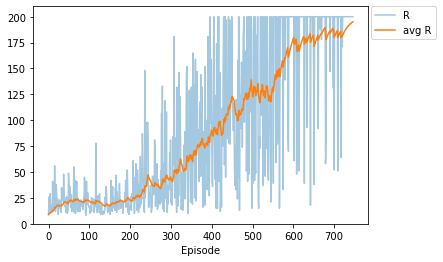

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

rewards = plt.plot(R, alpha=.4, label='R')
avg_rewards = plt.plot(R_avg,label='avg R')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Episode')
plt.ylim(0, 210)
plt.show()

Congratulations, you have now successfully implemented the DDQN algorithm. You are encouraged to explore different problems. There are a lot of different environments ready for you to implement your algorithms in. A few of these resources are:
* [OpenAI gym](https://github.com/openai/gym)
* [OpenAI Universe](https://github.com/openai/universe)
* [DeepMind Lab](https://deepmind.com/blog/open-sourcing-deepmind-lab/)

The model you implemented in this lab can be extended to solve harder problems. A good starting-point is to try to solve the Acrobot-problem, by loading the environment as 

**gym.make("Acrobot-v1")**.

The problem might require some modifications to how you decay $\epsilon$, but otherwise, the code you have written within this lab should be sufficient. 

### Task 3.4 Atari games

**(4 POE Optional)**

A common benchmark for reinforcement learning algorithms is the old Atari games. Each timestep for the Atari games, the agent observes a screenshot as its current state.

There is an issue with this definition of the agent state, what?

Name at least two solutions to the problem, and why it wouldn't work well without these changes. 

Hint:
- Imagine the game of pong. What is important for the algorithm to predict? What is the state of the agent? Is it possible to play the game optimally with this state formulation?

**Your answer:** For instance in the game of pong, the issue is that the agent only observes single screenshot as its current state, which gives no information about velocity \ acceleration. One of the solutions is to take a couple of screenshots so that the velocity \ acceleration can be calculated. One more solution could be done by giving game data from the RAM to the agent, so that the agent could estimate the velocity \ aacceleration easily.